<a href="https://colab.research.google.com/github/sohamkhatod/Data-Science-Project/blob/main/IDS_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
letter_recognition = fetch_ucirepo(id=59)

# data (as pandas dataframes)
X = letter_recognition.data.features
y = letter_recognition.data.targets

# metadata
print(letter_recognition.metadata)

# variable information
print(letter_recognition.variables)


{'uci_id': 59, 'name': 'Letter Recognition', 'repository_url': 'https://archive.ics.uci.edu/dataset/59/letter+recognition', 'data_url': 'https://archive.ics.uci.edu/static/public/59/data.csv', 'abstract': 'Database of character image features; try to identify the letter', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 20000, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['lettr'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1991, 'last_updated': 'Thu Sep 28 2023', 'dataset_doi': '10.24432/C5ZP40', 'creators': ['David Slate'], 'intro_paper': None, 'additional_info': {'summary': 'The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet.  The character images were based on 20 different fonts and each letter within these 20 fonts wa

In [ ]:
import pandas as pd
df = pd.concat([X,y],axis =1)
df.head()

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx lettr  
0      8      0      8      0      8     T  
1      9      2      8      4     10     I  
2      7      3      7      3      9     D  
3     10      6     10      2      8     N  
4      9      1      7      5     10     G

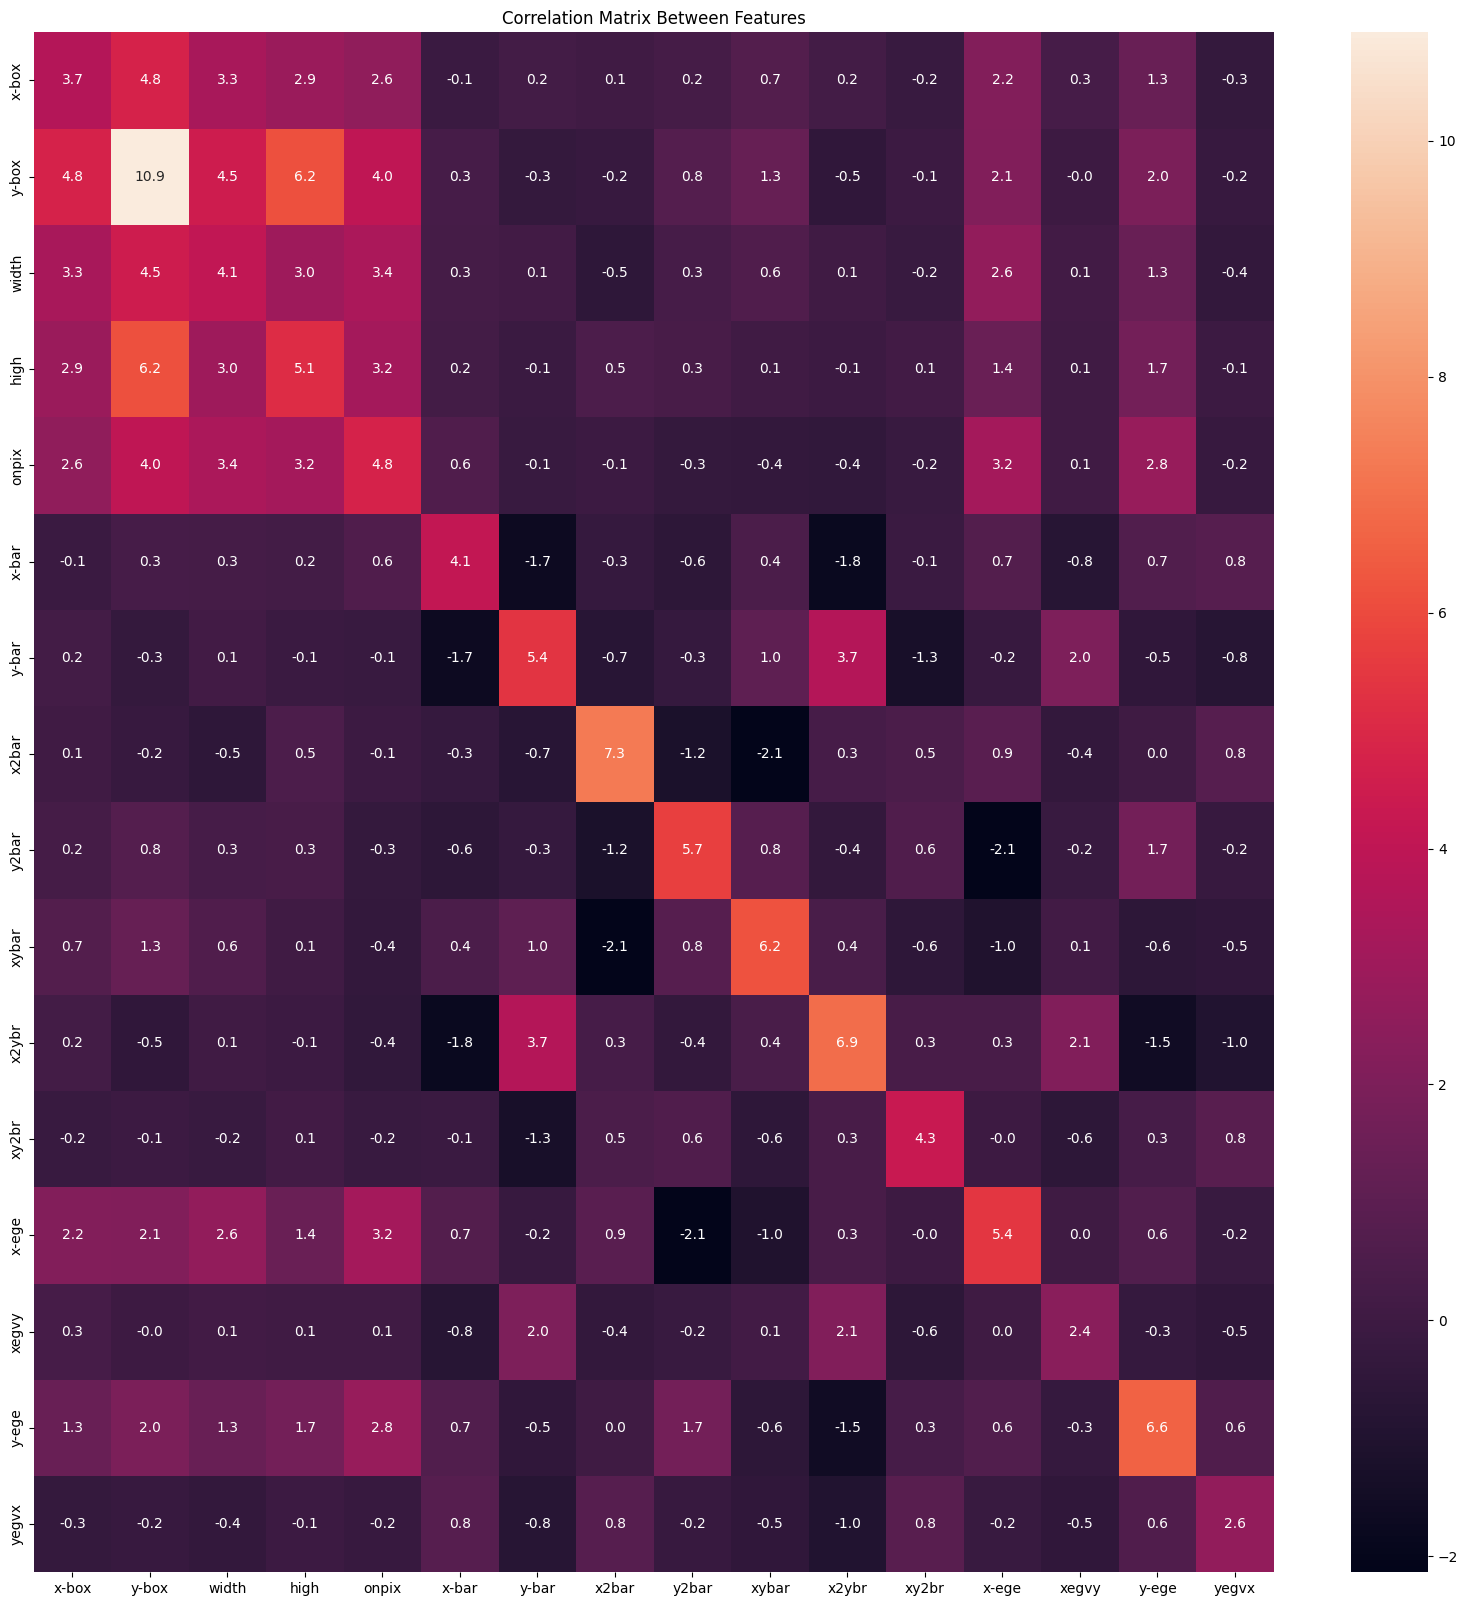

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
matrix = np.cov(X, rowvar=False, bias=True)

# Get the column names from X
column_names = list(X.columns)  # Replace with the actual method to get column names if X is a DataFrame

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(matrix, annot=True, fmt='.1f', xticklabels=column_names, yticklabels=column_names)
plt.title('Correlation Matrix Between Features')
plt.show()


Text(0.5, 1.0, 'Distribution of Target Variable')

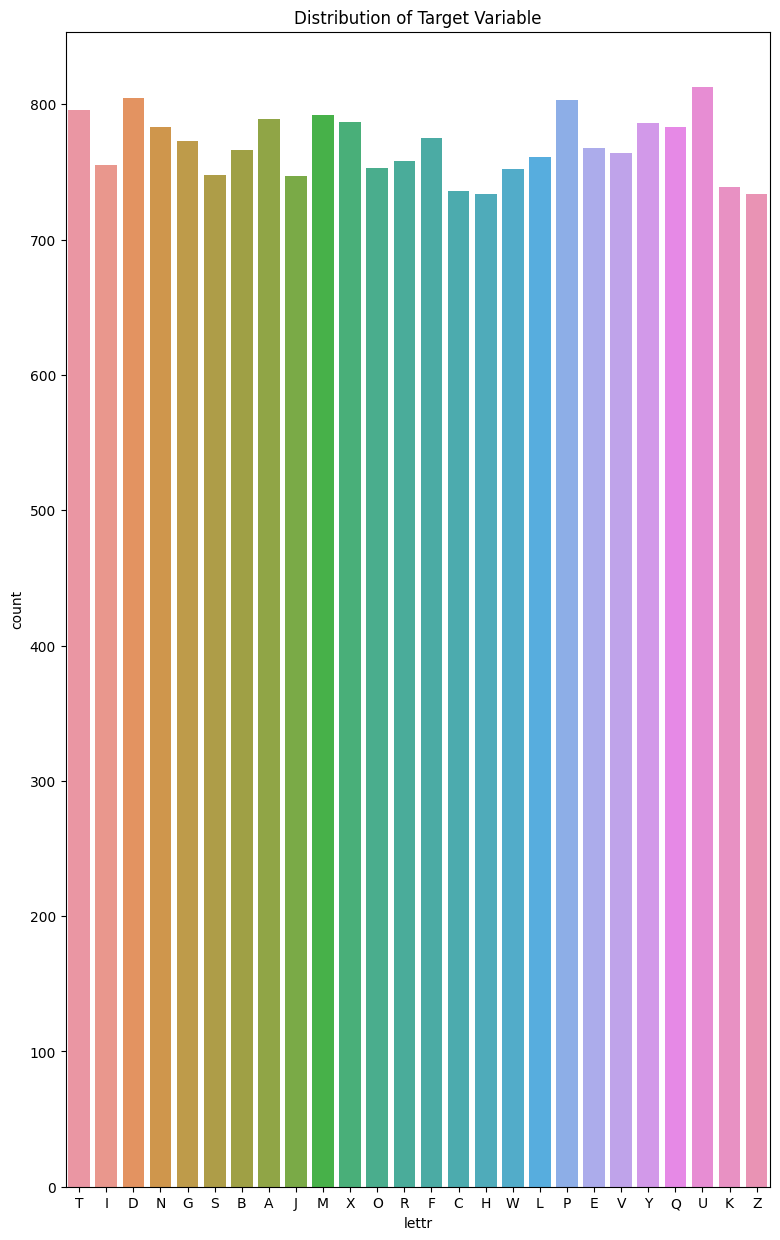

In [ ]:
# Data Exploration Plots
plt.figure(figsize=(20, 15))

# Histogram of the target variable
plt.subplot(1, 2, 1)
sns.countplot(x='lettr', data=df)
plt.title('Distribution of Target Variable')

In [ ]:
df = pd.concat([X,y],axis =1)

In [ ]:
df.head()

x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  x2ybr  \
0      2      8      3     5      1      8     13      0      6      6     10   
1      5     12      3     7      2     10      5      5      4     13      3   
2      4     11      6     8      6     10      6      2      6     10      3   
3      7     11      6     6      3      5      9      4      6      4      4   
4      2      1      3     1      1      8      6      6      6      6      5   

   xy2br  x-ege  xegvy  y-ege  yegvx lettr  
0      8      0      8      0      8     T  
1      9      2      8      4     10     I  
2      7      3      7      3      9     D  
3     10      6     10      2      8     N  
4      9      1      7      5     10     G

In [ ]:
# Function to save and show plots
def save_and_show_plot(plt, filename):
    plt.savefig(filename)
    plt.show()

NameError: ignored

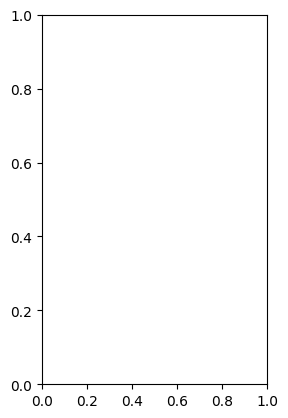

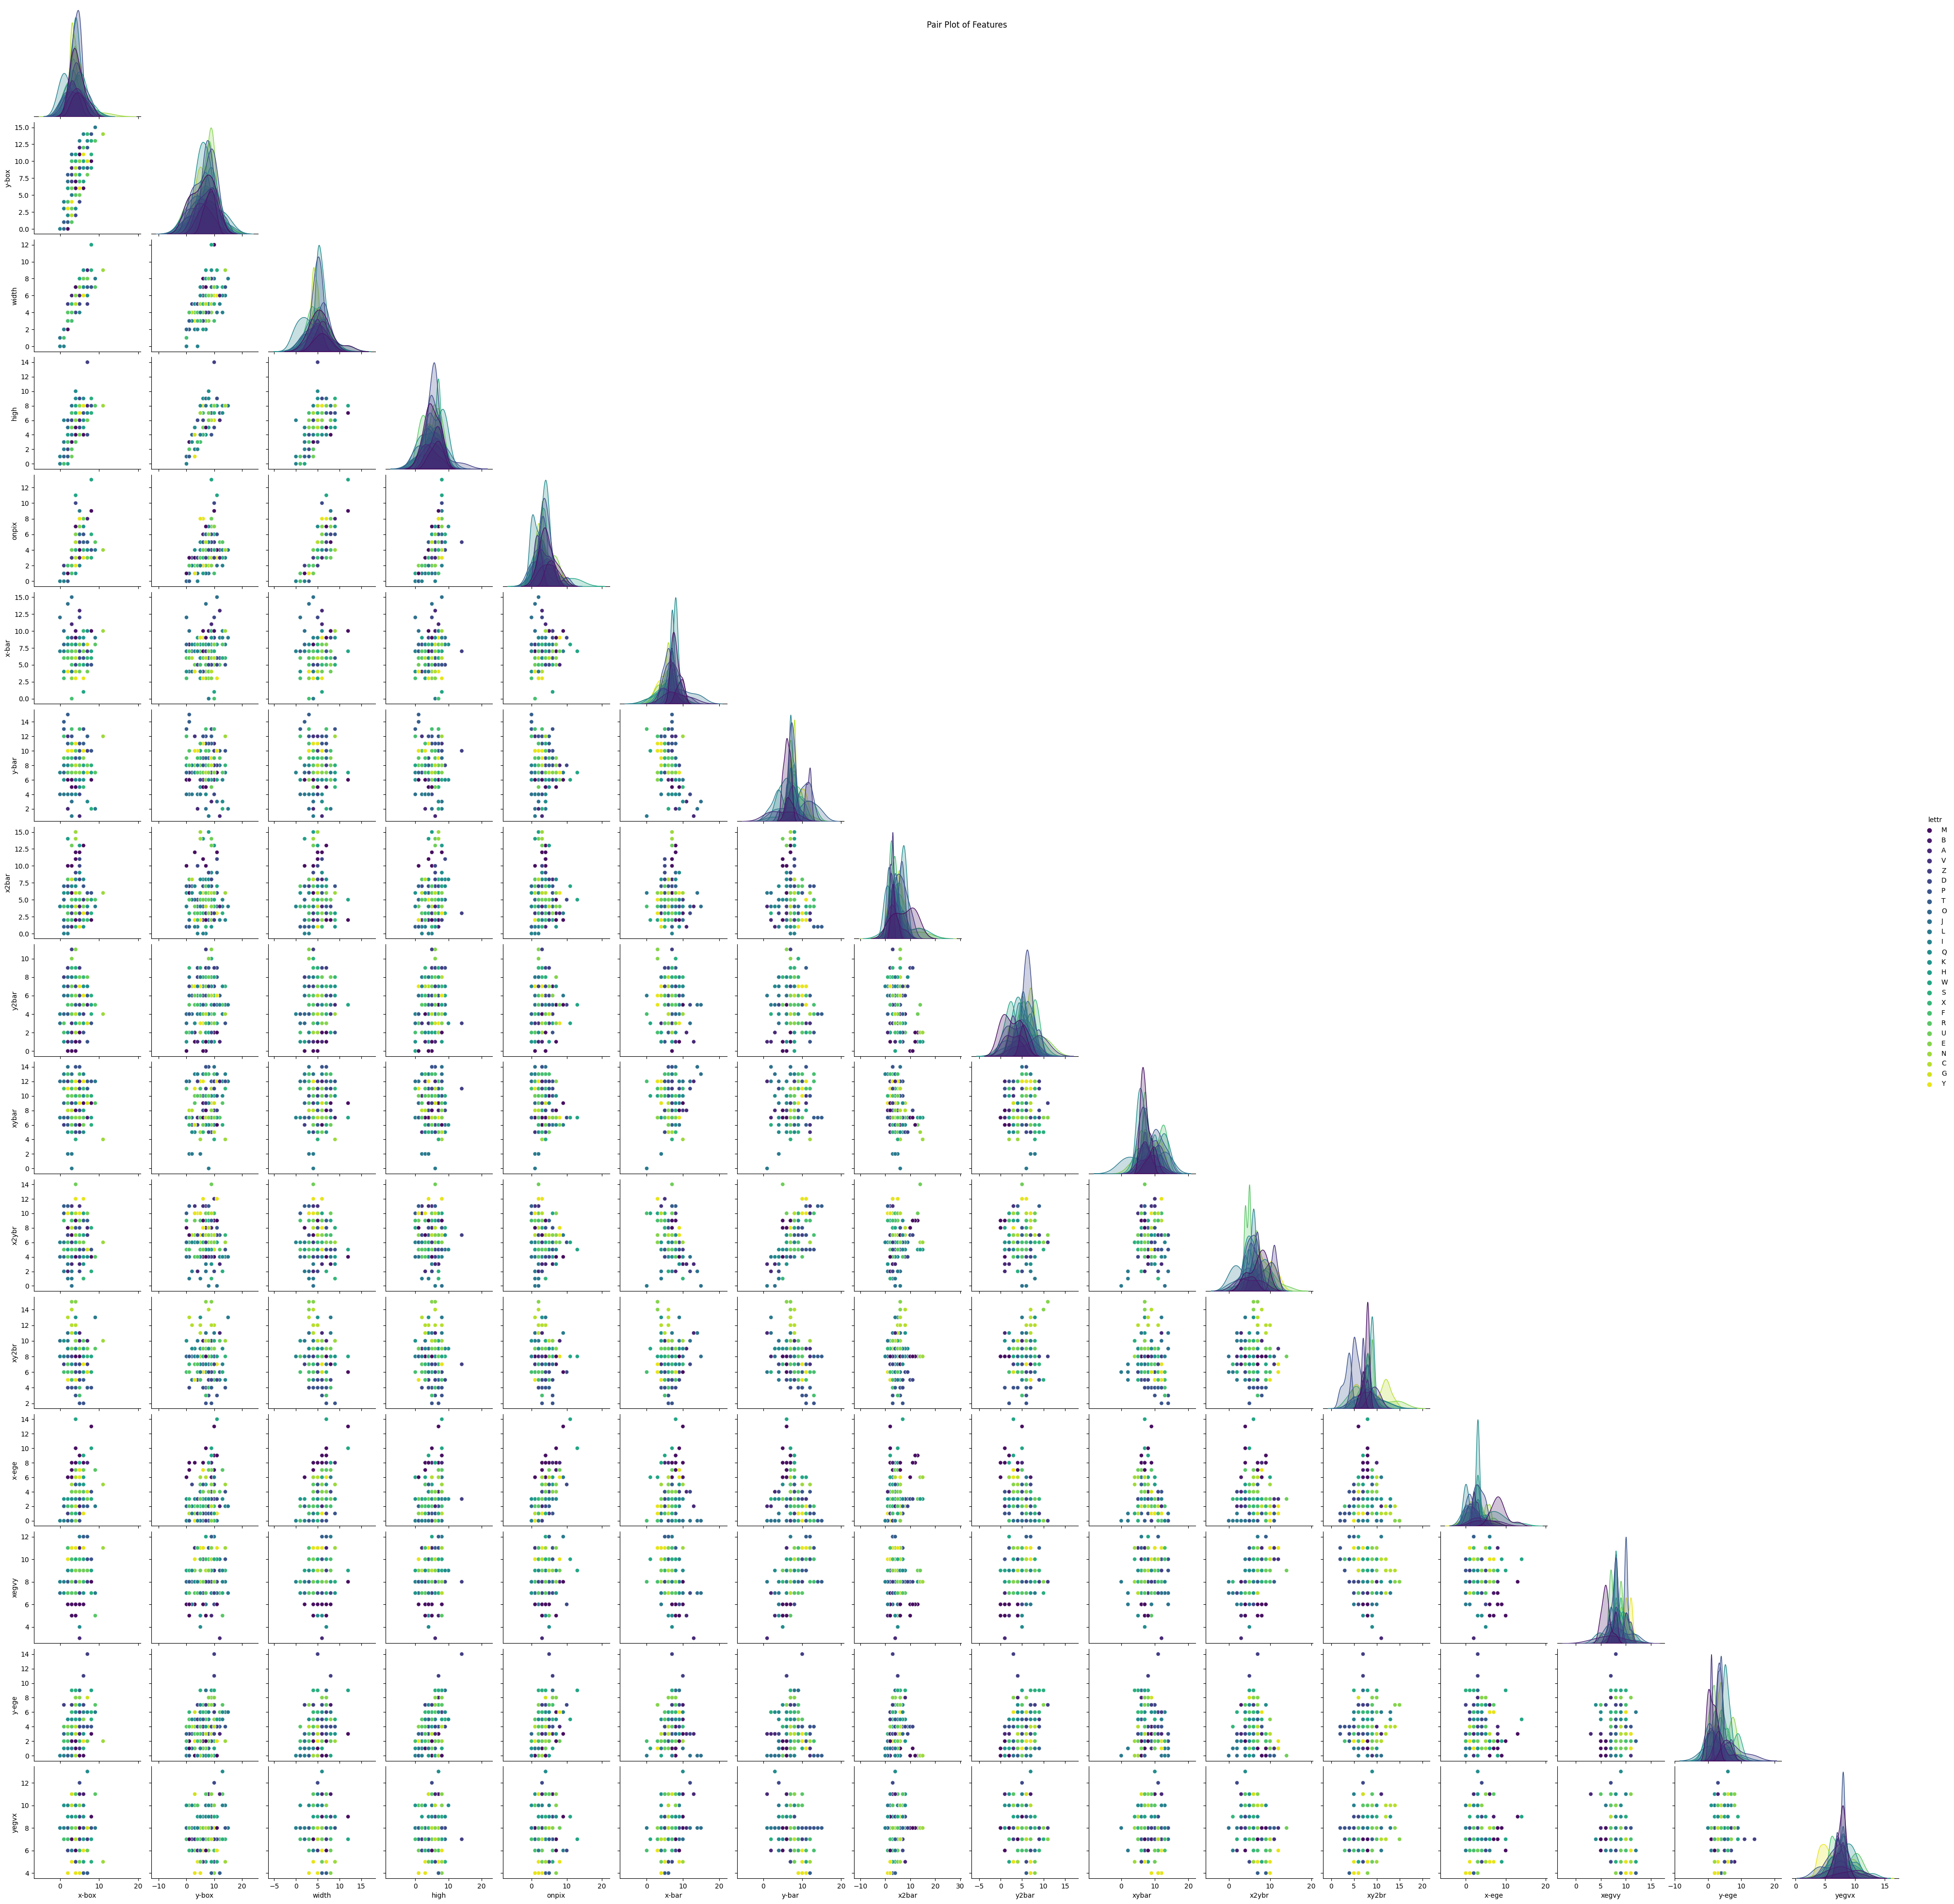

In [ ]:
 # Pair plot for a few key features
plt.subplot(1, 2, 2)
#sns.pairplot(df.sample(50), hue="species", diag_kind="hist" , corner=True)
sns.pairplot(df.sample(200), hue='lettr',  palette='viridis', corner=True)
plt.suptitle('Pair Plot of Features')
save_and_show_plot(plt, 'exploration_plots.png')

# Create and save pair plots for each pair of features
# for i, feature1 in enumerate(X.columns):
#     for j, feature2 in enumerate(X.columns):
#         if i < j:
#             plt.figure(figsize=(8, 6))
#             sns.scatterplot(x=feature1, y=feature2, hue='lettr', data=df, palette='viridis')
#             plt.title(f'Pair Plot: {feature1} vs {feature2}')
#             plt.xlabel(feature1)
#             plt.ylabel(feature2)
#             save_and_show_plot(plt, f'pair_plot_{feature1}_{feature2}.png')
#             plt.show()

In [ ]:
# Choose features for the bar chart (e.g., 'lettr' vs. 'x-box')

for i, feature in enumerate(X.columns):
  feature_for_bar_chart_x = 'lettr'
  feature_for_bar_chart_y = feature

  plt.figure(figsize=(12, 6))
  sns.barplot(x=feature_for_bar_chart_x, y=feature_for_bar_chart_y, data=df, palette='viridis')
  plt.title(f'Bar Chart: {feature_for_bar_chart_y} vs {feature_for_bar_chart_x}')
  plt.xlabel(feature_for_bar_chart_x)
  plt.ylabel(feature_for_bar_chart_y)
  plt.savefig('bar_chart.png')
  plt.show()


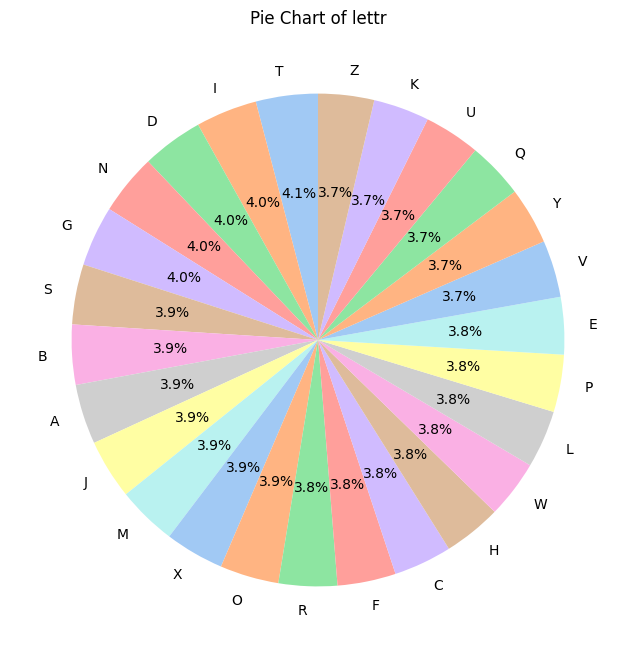

In [ ]:
feature_for_pie_chart = 'lettr'

plt.figure(figsize=(8, 8))
plt.pie(df[feature_for_pie_chart].value_counts(), labels=df[feature_for_pie_chart].unique(), autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f'Pie Chart of {feature_for_pie_chart}')
plt.savefig('pie_chart.png')
plt.show()

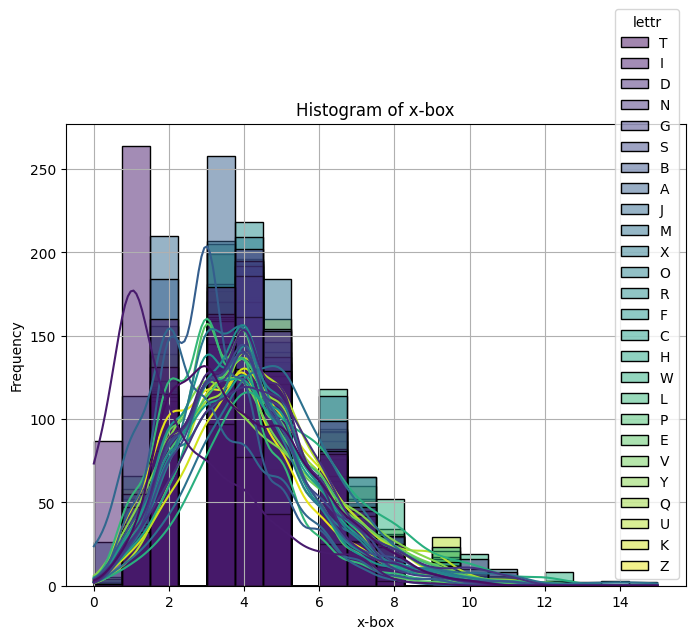

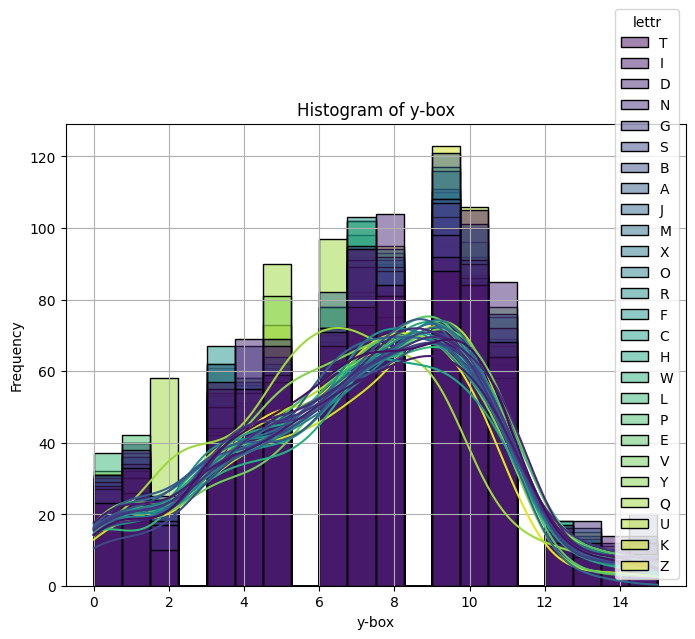

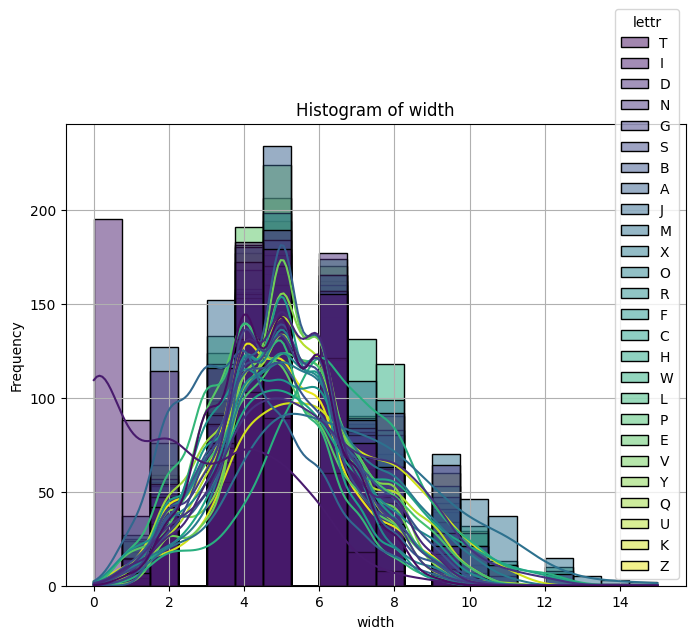

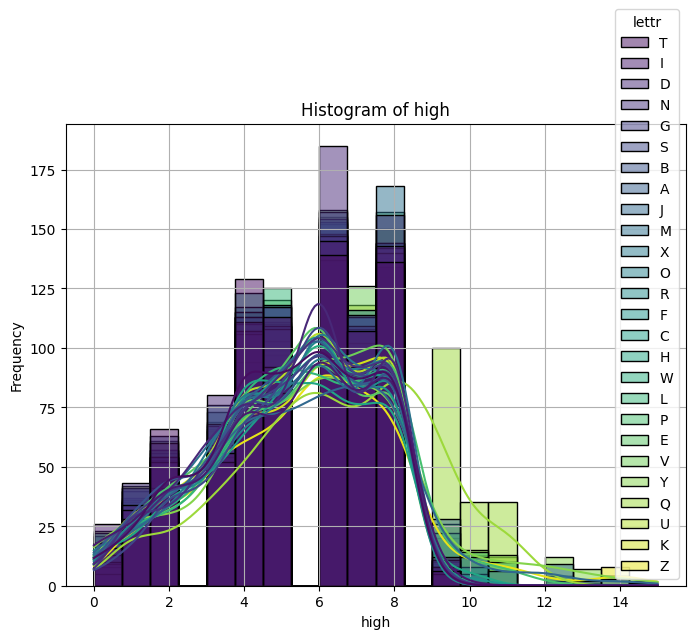

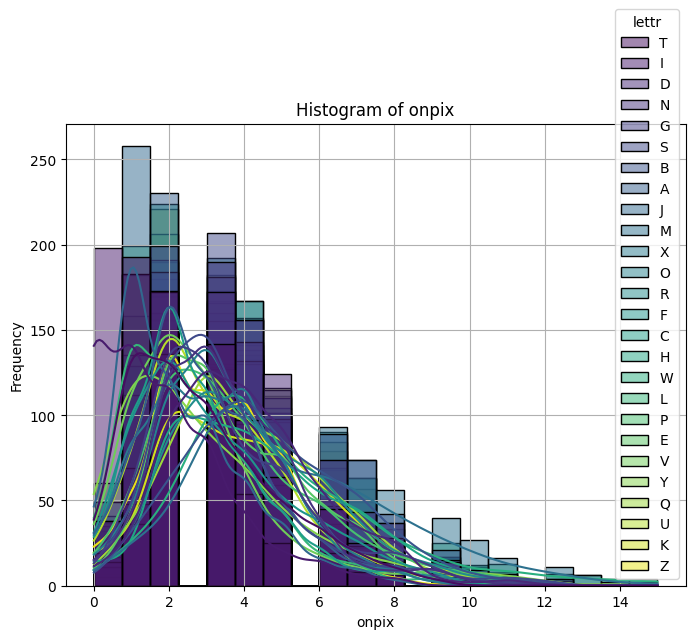

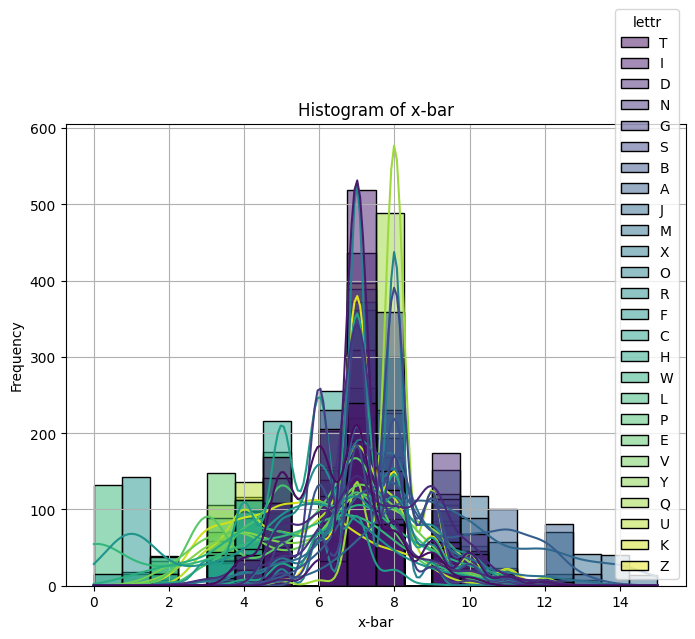

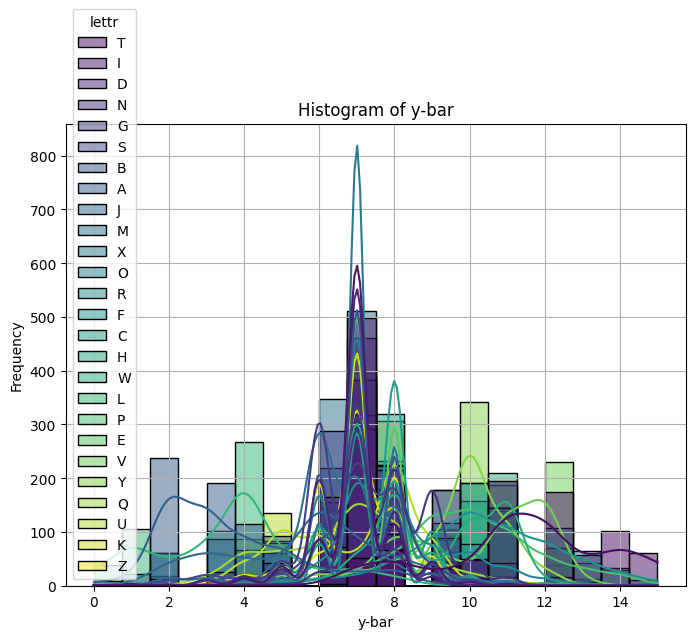

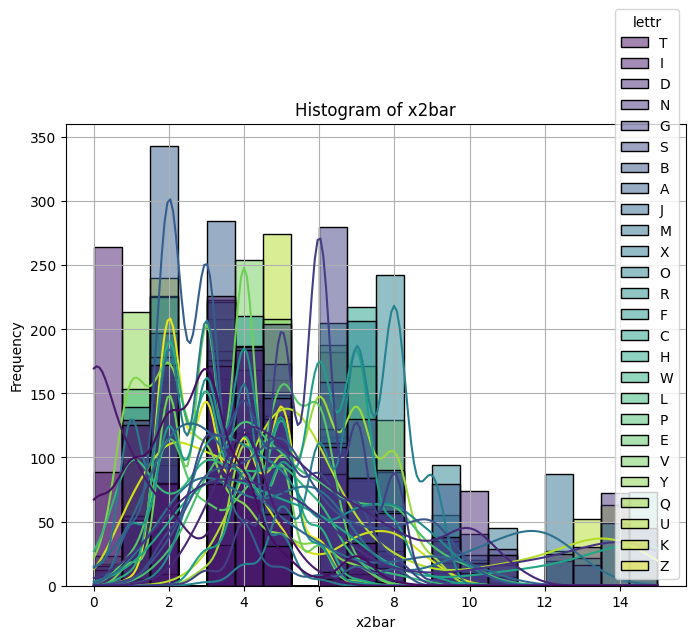

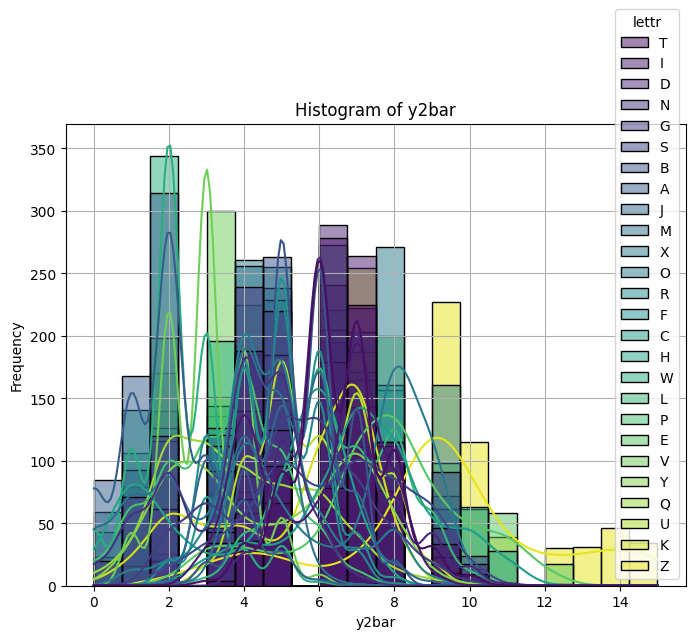

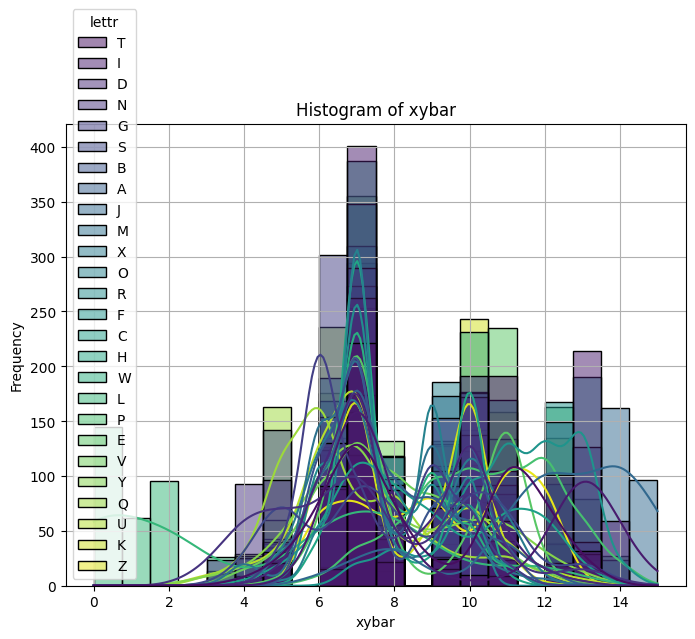

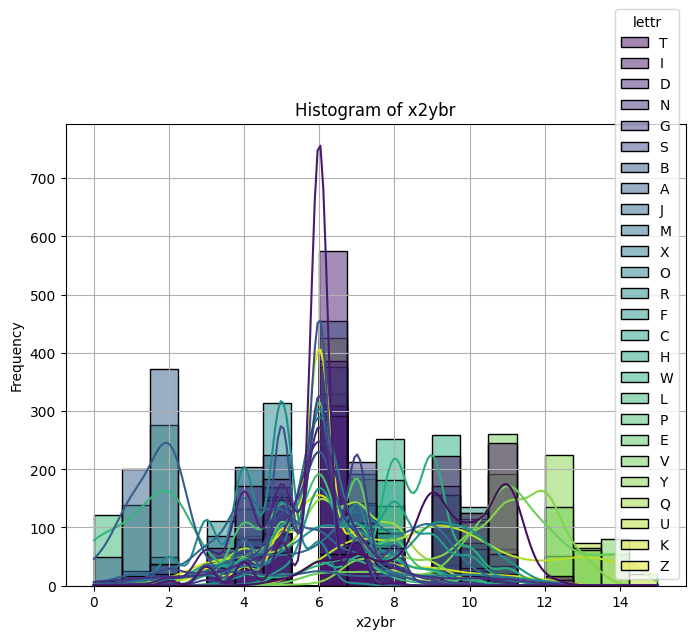

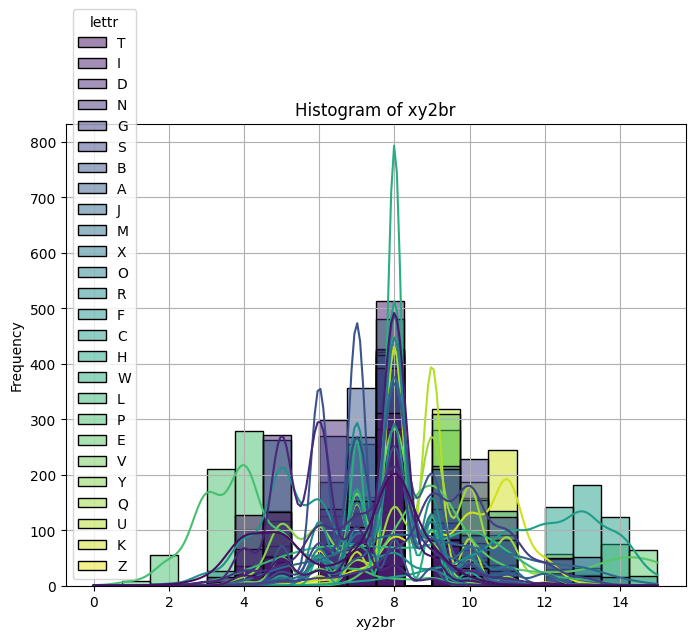

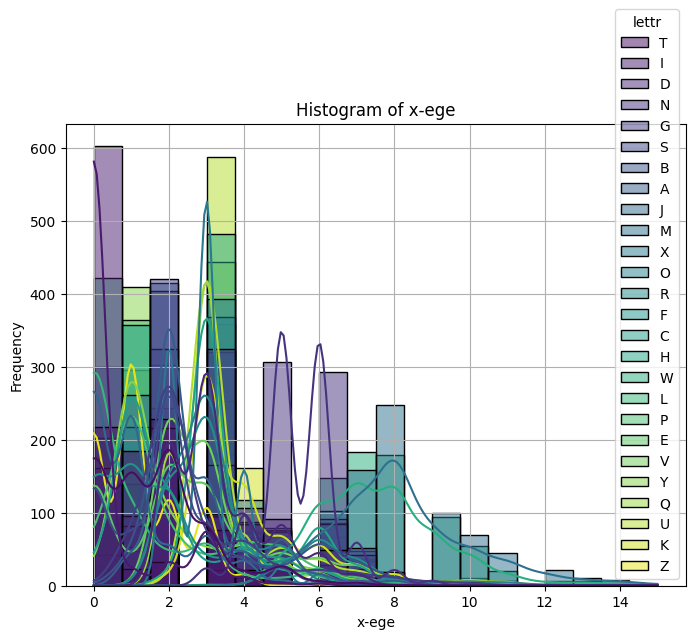

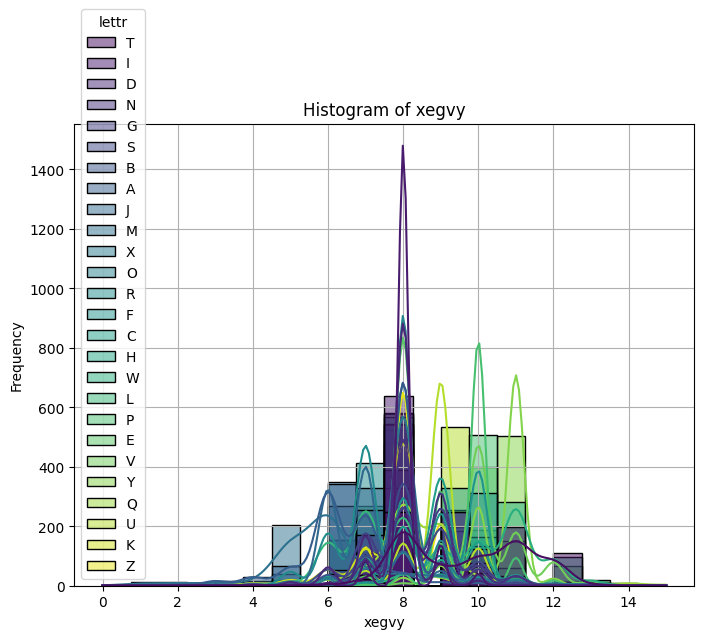

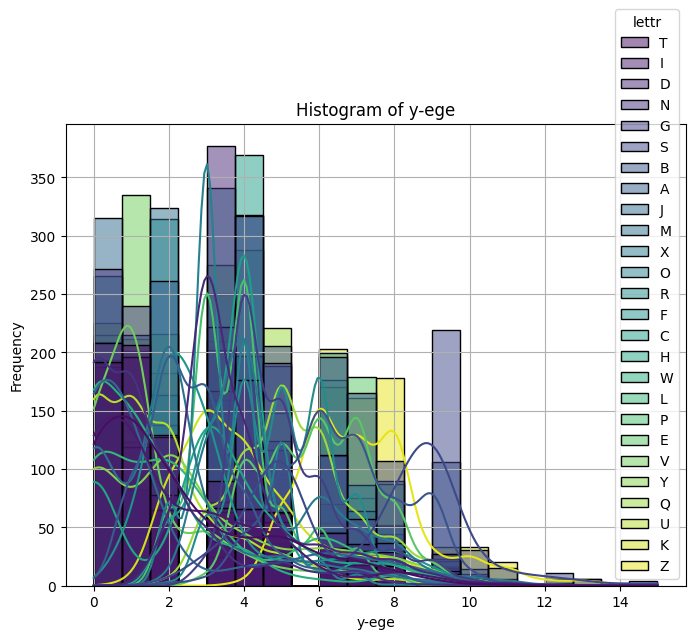

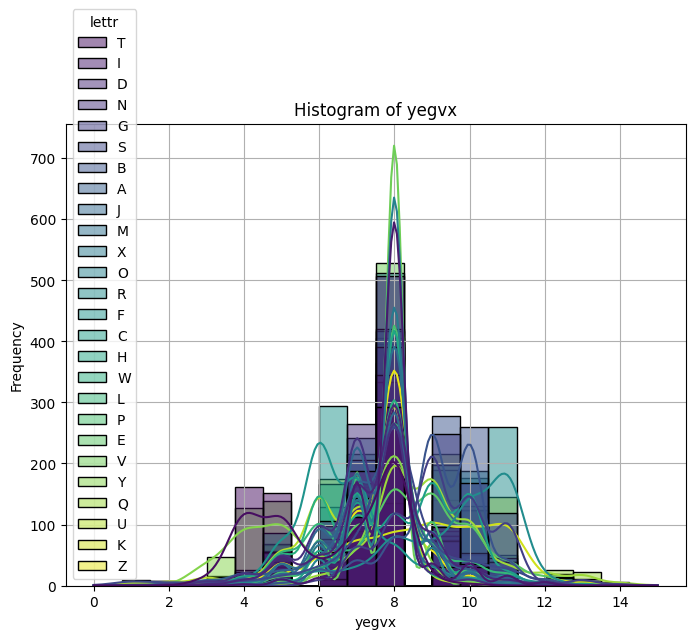

In [ ]:
# Choose a feature for the histogram (e.g., 'x-box')
# We can see where the values for each feature variables lie

# In order to gain a comprehensive understanding of the distribution and characteristics of the features within our letter recognition dataset, histograms were employed
# for each individual feature variable. These histograms provided a visual depiction of the frequency distribution of values, offering insights into the central tendencies,
# variations, and patterns present in the dataset. By examining the histograms for features such as 'x-box', 'y-box', 'width', 'height', and others, we were able to discern
# the prevalence of specific values and observe any notable patterns within each feature. This exploratory analysis lays the foundation for
#  informed decision-making during subsequent stages of data preprocessing and modeling, enhancing our ability to derive meaningful insights from the dataset



for i, feature in enumerate(X.columns):
  feature_for_histogram = feature

  plt.figure(figsize=(8, 6))
  sns.histplot(data=df, x=feature_for_histogram, hue = 'lettr'  ,bins=20, palette='viridis', kde=True)
  #plt.hist( color='skyblue', edgecolor='black')
  plt.title(f'Histogram of {feature_for_histogram}')
  plt.xlabel(feature_for_histogram)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.savefig('histogram.png')
  plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=None)  # You can set n_components to the desired number of components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier on the reduced feature space
rf_model_lda = RandomForestClassifier(random_state=42)
rf_model_lda.fit(X_train_lda, y_train)
rf_predictions_lda = rf_model_lda.predict(X_test_lda)

# Evaluate the model
print("Random Forest Classifier with LDA:")
print("Accuracy:", accuracy_score(y_test, rf_predictions_lda))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions_lda))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions_lda))

# Visualize the explained variance ratio of each component
explained_variance_ratio = lda.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio of LDA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

Random Forest Classifier with LDA:
Accuracy: 0.91875

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       149
           1       0.83      0.92      0.87       153
           2       0.95      0.89      0.92       137
           3       0.84      0.96      0.89       156
           4       0.94      0.93      0.93       141
           5       0.87      0.87      0.87       140
           6       0.89      0.90      0.90       160
           7       0.79      0.76      0.78       144
           8       0.99      0.92      0.96       146
           9       0.95      0.94      0.94       149
          10       0.83      0.85      0.84       130
          11       0.95      0.95      0.95       155
          12       0.91      0.96      0.93       168
          13       0.93      0.91      0.92       151
          14       0.87      0.88      0.87       145
          15       0.96      0.91      0.94       173
   

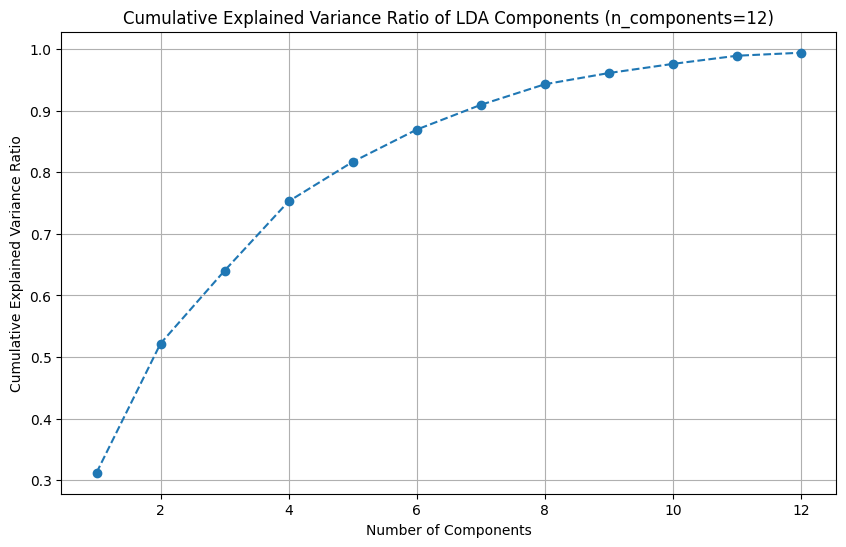

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Apply Linear Discriminant Analysis (LDA)
lda = LinearDiscriminantAnalysis(n_components=12)  # You can set n_components to the desired number of components
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Train a classifier on the reduced feature space
rf_model_lda = RandomForestClassifier(random_state=42)
rf_model_lda.fit(X_train_lda, y_train)
rf_predictions_lda = rf_model_lda.predict(X_test_lda)

# Evaluate the model
print("Random Forest Classifier with LDA:")
print("Accuracy:", accuracy_score(y_test, rf_predictions_lda))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions_lda))

#print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_predictions_lda))

# Get the explained variance ratio for all components (16 in total)
explained_variance_ratio = lda.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

# Plot the cumulative explained variance ratio for all components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio of LDA Components (n_components=12)')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Display original target variable
print("Original 'lettr' values:")
print(y['lettr'])

# Encode the target variable using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y['lettr'])

# Display the encoded target variable
print("\nEncoded 'lettr' values:")

y_encoded = pd.DataFrame({ 'lettr' : y_encoded} )

print(y_encoded['lettr'])

# Inverse transform to see the original labels from the encoded values
decoded_values = le.inverse_transform(y_encoded['lettr'])
print("\nDecoded values:")
print(decoded_values)

Original 'lettr' values:
0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: lettr, Length: 20000, dtype: object

Encoded 'lettr' values:
0        19
1         8
2         3
3        13
4         6
         ..
19995     3
19996     2
19997    19
19998    18
19999     0
Name: lettr, Length: 20000, dtype: int64

Decoded values:
['T' 'I' 'D' ... 'T' 'S' 'A']


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#encoding of data is needed for classification

df = pd.concat([X,y_encoded],axis =1)

y_encoded = df['lettr']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
rf_predictions = rf_model.predict(X_test)
rf_accuracy =  accuracy_score(y_test, rf_predictions)

print(f'Sample Input: {X_test.iloc[0]} \n'
      f'Sample Output: {rf_predictions[0]} \n'
      f'Decoded Output: {le.inverse_transform([rf_predictions[0]])[0]} \n'
      f'True Output: {le.inverse_transform([y_test.iloc[0]])[0]}\n')



Sample Input: x-box    3
y-box    6
width    5
high     6
onpix    4
x-bar    6
y-bar    7
x2bar    3
y2bar    8
xybar    8
x2ybr    6
xy2br    9
x-ege    3
xegvy    7
y-ege    7
yegvx    6
Name: 10650, dtype: int64 
Sample Output: 19 
Decoded Output: T 
True Output: T



Random Forest Classifier:
Accuracy: 0.9615

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       149
           1       0.89      0.97      0.93       153
           2       0.99      0.92      0.95       137
           3       0.90      0.97      0.94       156
           4       0.90      0.99      0.95       141
           5       0.93      0.97      0.95       140
           6       0.98      0.96      0.97       160
           7       0.96      0.89      0.92       144
           8       0.99      0.92      0.96       146
           9       0.95      0.98      0.97       149
          10       0.94      0.91      0.93       130
          11       0.99      0.97      0.98       155
          12       0.97      0.99      0.98       168
          13       0.98      0.92      0.95       151
          14       0.95      0.95      0.95       145
          15       0.97      0.95      0.96       173
          16 

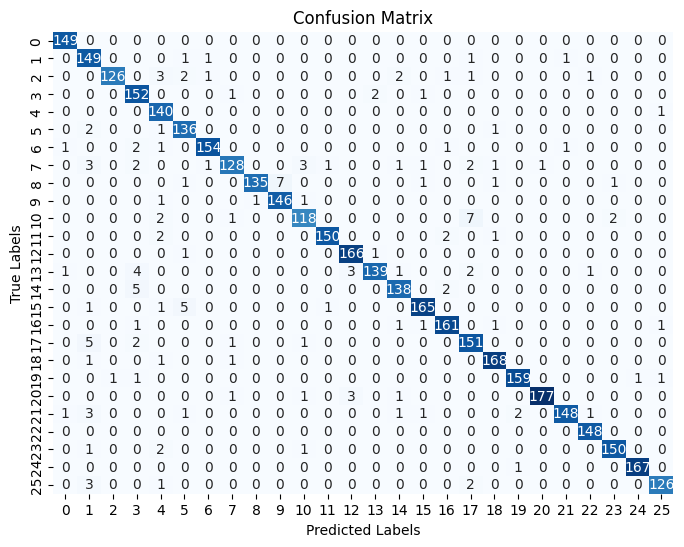

In [ ]:
# Evaluate Random Forest Model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print("\nClassification Report:\n", classification_report(y_test, rf_predictions))
cm = confusion_matrix(y_test, rf_predictions)

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


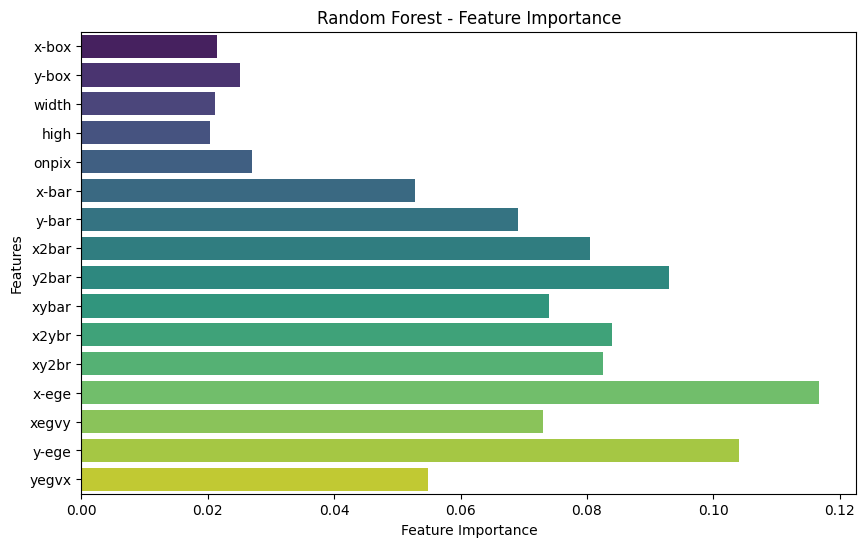

In [ ]:
# Feature Importance Plot for Random Forest
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns, palette='viridis')
plt.title('Random Forest - Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
# Support Vector Machine (SVM) Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f'Sample Input: {X_test.iloc[0]} \n'
      f'Sample Output: {svm_predictions[0]} \n'
      f'Decoded Output: {le.inverse_transform([svm_predictions[0]])[0]} \n'
      f'True Output: {le.inverse_transform([y_test.iloc[0]])[0]}\n')

Sample Input: x-box    3
y-box    6
width    5
high     6
onpix    4
x-bar    6
y-bar    7
x2bar    3
y2bar    8
xybar    8
x2ybr    6
xy2br    9
x-ege    3
xegvy    7
y-ege    7
yegvx    6
Name: 10650, dtype: int64 
Sample Output: 23 
Decoded Output: X 
True Output: T




Support Vector Machine (SVM) Classifier:
Accuracy: 0.9305

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       149
           1       0.83      0.93      0.88       153
           2       0.97      0.90      0.93       137
           3       0.82      0.98      0.89       156
           4       0.91      0.92      0.92       141
           5       0.88      0.96      0.91       140
           6       0.88      0.93      0.91       160
           7       0.96      0.74      0.83       144
           8       0.97      0.92      0.94       146
           9       0.95      0.93      0.94       149
          10       0.88      0.86      0.87       130
          11       0.99      0.92      0.95       155
          12       0.96      0.98      0.97       168
          13       0.98      0.92      0.95       151
          14       0.90      0.92      0.91       145
          15       0.99      0.86      0.92       1

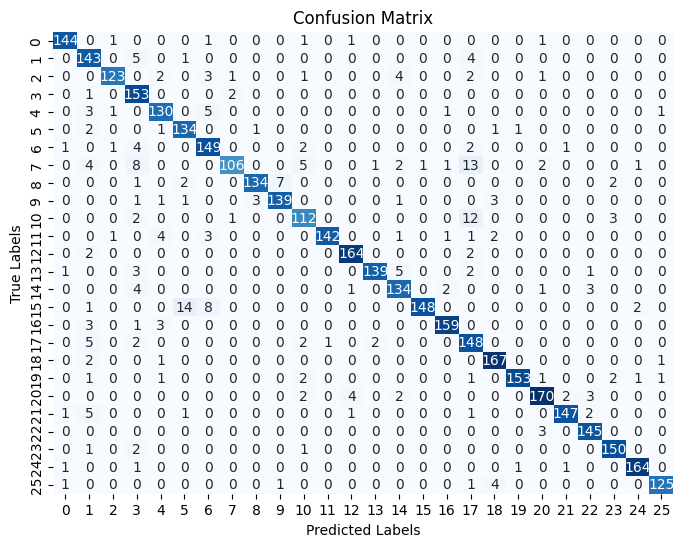

In [ ]:
# Evaluate SVM Model
print("\nSupport Vector Machine (SVM) Classifier:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions)

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf



# Build a Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # Output layer with 26 units for each letter
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)



Neural Network Classifier:
Accuracy: 0.8980000019073486
125/125 [==============================] - 0s 4ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95       149
           1       0.88      0.84      0.86       153
           2       0.94      0.84      0.89       137
           3       0.85      0.89      0.87       156
           4       0.91      0.78      0.84       141
           5       0.85      0.84      0.84       140
           6       0.78      0.86      0.82       160
           7       0.85      0.74      0.79       144
           8       0.94      0.88      0.91       146
           9       0.93      0.92      0.93       149
          10       0.89      0.87      0.88       130
          11       0.87      0.92      0.89       155
          12       0.98      0.95      0.96       168
          13       0.84      0.97      0.90       151
          14       0.91      0.94      0.93       145

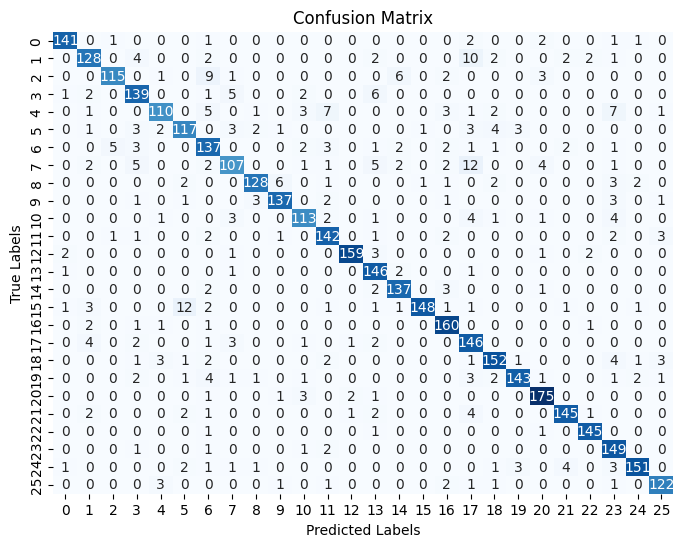

In [ ]:
# Evaluate the model on the test set
_, nn_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Classifier:")
print("Accuracy:", nn_accuracy)

# Make predictions
nn_predictions = tf.argmax(model.predict(X_test) ,axis =-1)

# Decode predictions to original labels
nn_predictions_labels = le.inverse_transform(nn_predictions)

# Evaluate Neural Network Model
print("\nClassification Report:\n", classification_report(y_test, nn_predictions))
cm = confusion_matrix(y_test, nn_predictions)

# Create a Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create a KNN classifier (you can adjust the 'n_neighbors' parameter)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set
knn_predictions = knn_classifier.predict(X_test_scaled)
# Print a sample prediction along with its details
print(f'Sample Input: {X_test.iloc[0]} \n'
      f'Sample Output: {knn_predictions[0]} \n'
      f'Decoded Output: {le.inverse_transform([knn_predictions[0]])[0]} \n'
      f'True Output: {y_test.iloc[0]}\n')


Sample Input: x-box    3
y-box    6
width    5
high     6
onpix    4
x-bar    6
y-bar    7
x2bar    3
y2bar    8
xybar    8
x2ybr    6
xy2br    9
x-ege    3
xegvy    7
y-ege    7
yegvx    6
Name: 10650, dtype: int64 
Sample Output: 19 
Decoded Output: T 
True Output: 19



Accuracy: 0.9425


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       149
           1       0.87      0.97      0.91       153
           2       0.95      0.94      0.95       137
           3       0.86      0.97      0.92       156
           4       0.92      0.96      0.94       141
           5       0.89      0.93      0.91       140
           6       0.96      0.94      0.95       160
           7       0.88      0.78      0.83       144
           8       0.96      0.93      0.94       146
           9       0.94      0.96      0.95       149
          10       0.90      0.87      0.88       130
          11       0.98      0.97      0.98       155
          12       0.97      0.96      0.96       168
          13       0.95      0.93      0.94       151
          14       0.93      0.94      0.94       145
          15       0.98      0.92      0.95       173
          16       0.97      0.95     

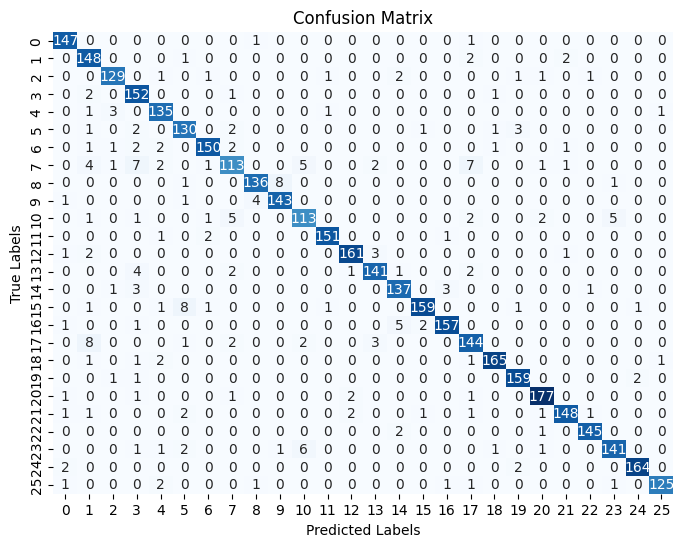

In [ ]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_predictions)
classification_report_str = classification_report(y_test, knn_predictions)

# Print the evaluation results
print(f'Accuracy: {knn_accuracy:.4f}\n')
print('\nClassification Report:\n', classification_report_str)
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, knn_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Print Model Comparison
print("Model Comparison:")
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("KNN Accuracy:", knn_accuracy)
print("Neural Network Accuracy:", nn_accuracy)

Model Comparison:
Random Forest Accuracy: 0.9615
SVM Accuracy: 0.9305
KNN Accuracy: 0.9425
Neural Network Accuracy: 0.8980000019073486


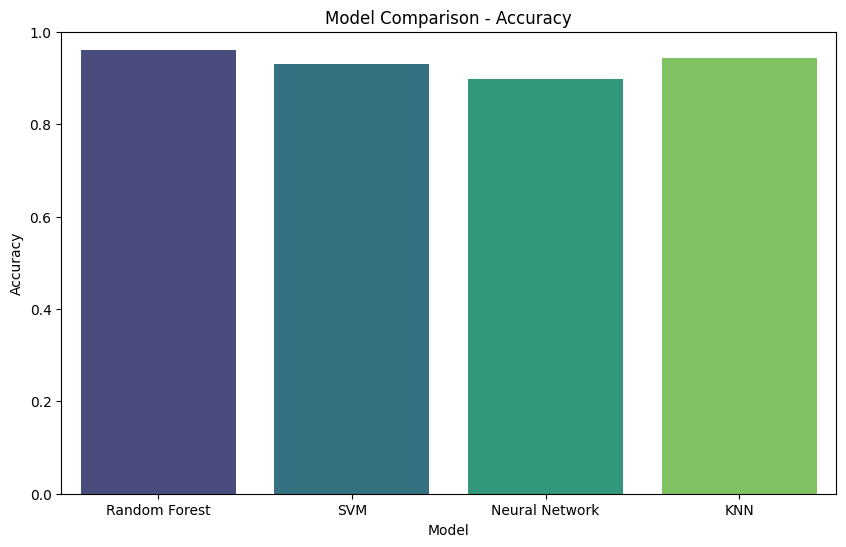

In [ ]:
# Plotting
models = ['Random Forest', 'SVM', 'Neural Network','KNN']
accuracies = [rf_accuracy, svm_accuracy, nn_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()